# Lab 8


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [1]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [2]:
filename="../Lab.7/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

In [3]:
df.head()

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859


## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA). 

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [4]:
import sklearn.discriminant_analysis as DA
#Fisher=DA.LinearDiscriminantAnalysis()

In [5]:
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [6]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]
#filter 
Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


We can train the classifier as follow:

In [7]:
Fisher.fit(X_Train,y_Train) # see how well the model separates 2 classes
#should have minimal overlap

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

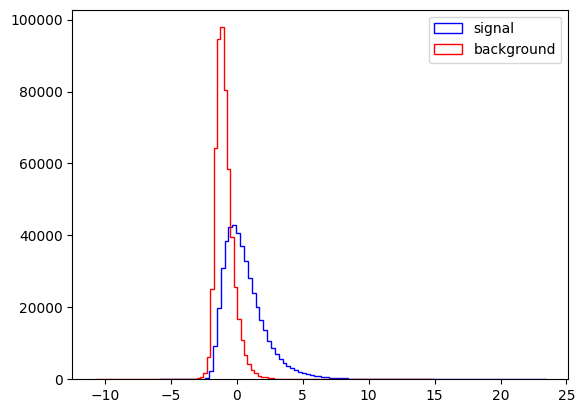

In [8]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score
# Decision scores for training and test sets
train_scores = Fisher.decision_function(X_Train)
test_scores = Fisher.decision_function(X_Test)

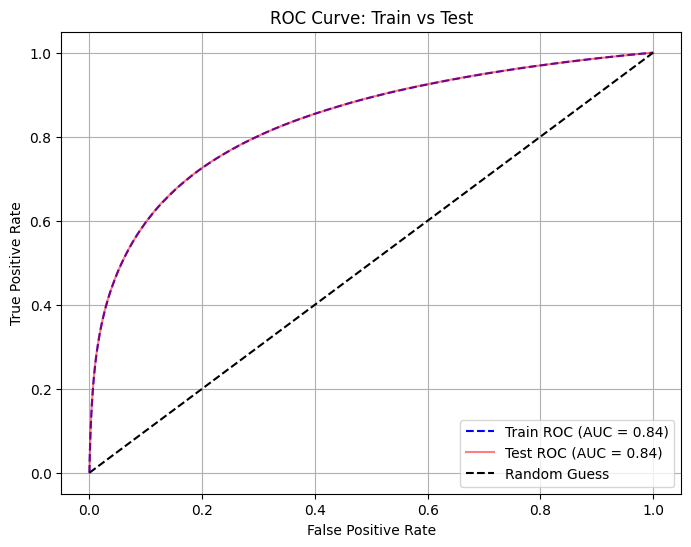

In [10]:
# ROC for training data
fpr_train, tpr_train, _ = roc_curve(y_Train, train_scores)
auc_train = roc_auc_score(y_Train, train_scores)
# ROC for test data
fpr_test, tpr_test, _ = roc_curve(y_Test, test_scores)
auc_test = roc_auc_score(y_Test, test_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, linestyle='--', label=f"Train ROC (AUC = {auc_train:.2f})", color="blue")
plt.plot(fpr_test, tpr_test, linestyle='-', label=f"Test ROC (AUC = {auc_test:.2f})", color="red", alpha=0.5)
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Train vs Test")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [11]:
print(f"Train AUC: {auc_train:.2f}")
print(f"Test AUC: {auc_test:.2f}")


Train AUC: 0.84
Test AUC: 0.84


The curves are plotting similarly on this ROC curve graph, this means that the model is not overfitting to the training data and therefore, making cosistent predictions on both data sets. It is concluded that there is little bias in this model as displayed by the AUC scores. 

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot. 

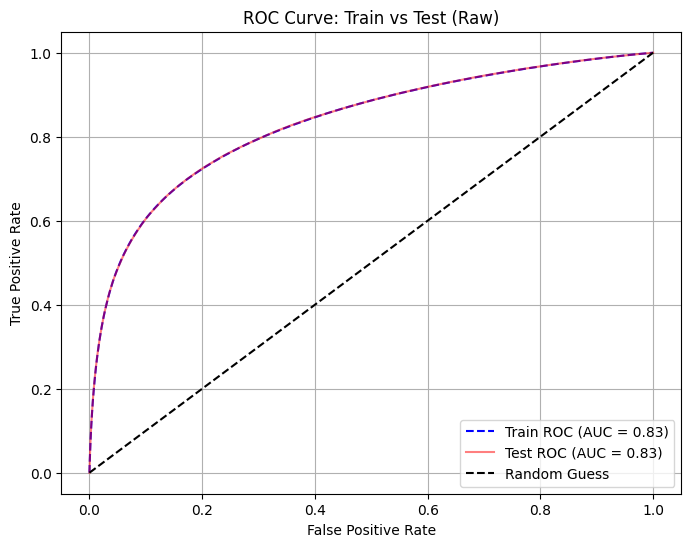

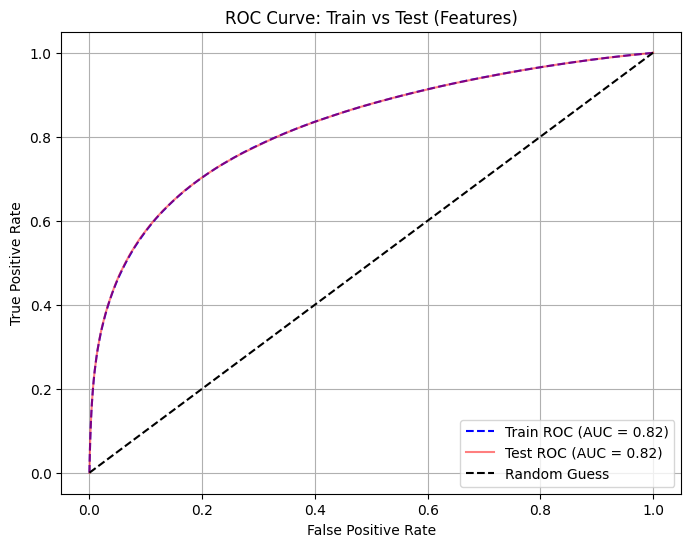

In [ ]:
RawNames = ["l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", 
            "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames = list(set(VarNames[1:]).difference(RawNames))  # Exclude 'signal'
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Train Fisher model for raw, features, and combined
inputs = {
    "Raw": RawNames,
    "Features": FeatureNames,
    "Raw + Features": list(set(RawNames + FeatureNames))
}

results = {}

for input_type, cols in inputs.items():
    # Train Fisher model
    Fisher = LinearDiscriminantAnalysis()
    Fisher.fit(X_Train[cols], y_Train)
    
    # Decision scores for train and test sets
    train_scores = Fisher.decision_function(X_Train[cols])
    test_scores = Fisher.decision_function(X_Test[cols])
    
    # Compute AUC
    auc_train = roc_auc_score(y_Train, train_scores)
    auc_test = roc_auc_score(y_Test, test_scores)
    results[input_type] = (auc_train, auc_test)
    
    # Plot ROC curves
    fpr_train, tpr_train, _ = roc_curve(y_Train, train_scores)
    fpr_test, tpr_test, _ = roc_curve(y_Test, test_scores)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, linestyle='--', label=f"Train ROC (AUC = {auc_train:.2f})", color="blue")
    plt.plot(fpr_test, tpr_test, linestyle='-', label=f"Test ROC (AUC = {auc_test:.2f})", color="red", alpha=0.5)
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.title(f"ROC Curve: Train vs Test ({input_type})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Display results
for input_type, (auc_train, auc_test) in results.items():
    print(f"{input_type}: Train AUC = {auc_train:.2f}, Test AUC = {auc_test:.2f}")




AUC values of 0.83 and 0.82 indicate that the model has a good ability to discriminate between the signal and background classes. While it’s not perfect, it is performing better than random guessing (AUC = 0.5). The model is likely capturing the true relationship in the data rather than overfitting to noise in the training set.

### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

In [ ]:
#a 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
import matplotlib.pyplot as plt

# List of classifiers to compare
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(probability=True)  # SVM with probability estimation
}

# Store results
results = {}

for clf_name, clf in classifiers.items():
    # Train classifier
    clf.fit(X_Train[FeatureNames], y_Train)
    
    # Decision scores for train and test sets
    train_scores = clf.predict_proba(X_Train[FeatureNames])[:, 1]  # Probability of the positive class
    test_scores = clf.predict_proba(X_Test[FeatureNames])[:, 1]
    
    # Compute AUC
    auc_train = roc_auc_score(y_Train, train_scores)
    auc_test = roc_auc_score(y_Test, test_scores)
    results[clf_name] = (auc_train, auc_test)
    
    # Plot ROC curves
    fpr_train, tpr_train, _ = roc_curve(y_Train, train_scores)
    fpr_test, tpr_test, _ = roc_curve(y_Test, test_scores)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, linestyle='--', label=f"Train ROC (AUC = {auc_train:.2f})", color="blue")
    plt.plot(fpr_test, tpr_test, linestyle='-', label=f"Test ROC (AUC = {auc_test:.2f})", color="red", alpha=0.5)
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.title(f"ROC Curve: {clf_name} (Train vs Test)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Display results for all classifiers
for clf_name, (auc_train, auc_test) in results.items():
    print(f"{clf_name}: Train AUC = {auc_train:.2f}, Test AUC = {auc_test:.2f}")


In [1]:
#b
def compare_classifier_performance(clf, X_Train, y_Train, X_Test, y_Test, FeatureNames):
    """
    Function to compare the performance of a classifier.

    Args:
    clf: The classifier to evaluate (already instantiated).
    X_Train: Training feature set.
    y_Train: Training target set.
    X_Test: Testing feature set.
    y_Test: Testing target set.
    FeatureNames: List of feature names to use for training.

    Returns:
    None. Plots ROC curves and prints AUC and F1 scores.
    """
    
    # Train classifier
    clf.fit(X_Train[FeatureNames], y_Train)
    
    # Decision scores for train and test sets (probabilities of positive class)
    train_scores = clf.predict_proba(X_Train[FeatureNames])[:, 1]  
    test_scores = clf.predict_proba(X_Test[FeatureNames])[:, 1]
    
    # Compute AUC for train and test
    auc_train = roc_auc_score(y_Train, train_scores)
    auc_test = roc_auc_score(y_Test, test_scores)
    
    # Plot ROC curves
    fpr_train, tpr_train, _ = roc_curve(y_Train, train_scores)
    fpr_test, tpr_test, _ = roc_curve(y_Test, test_scores)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, linestyle='--', label=f"Train ROC (AUC = {auc_train:.2f})", color="blue")
    plt.plot(fpr_test, tpr_test, linestyle='-', label=f"Test ROC (AUC = {auc_test:.2f})", color="red", alpha=0.5)
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.title(f"ROC Curve: {clf.__class__.__name__} (Train vs Test)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    # Print AUC results
    print(f"{clf.__class__.__name__}: Train AUC = {auc_train:.2f}, Test AUC = {auc_test:.2f}")
    
    # Calculate and print F1 score
    f1_train = f1_score(y_Train, clf.predict(X_Train[FeatureNames]))
    f1_test = f1_score(y_Test, clf.predict(X_Test[FeatureNames]))
    
    print(f"F1 Score - Train: {f1_train:.2f}, Test: {f1_test:.2f}")
    
# Example usage with a chosen classifier (e.g., Logistic Regression)
from sklearn.linear_model import LogisticRegression
# Instantiate classifier
clf = LogisticRegression()

# Compare performance
compare_classifier_performance(clf, X_Train, y_Train, X_Test, y_Test, FeatureNames)


In [ ]:
#c
def compute_maximal_significance(clf, X_Train, y_Train, X_Test, y_Test, FeatureNames):
    """
    Function to compute maximal significance by optimizing the decision threshold for F1 score.

    Args:
    clf: The classifier to evaluate (already instantiated).
    X_Train: Training feature set.
    y_Train: Training target set.
    X_Test: Testing feature set.
    y_Test: Testing target set.
    FeatureNames: List of feature names to use for training.

    Returns:
    None. Prints the maximal significance (F1 score at optimal threshold).
    """
    
    # Train classifier
    clf.fit(X_Train[FeatureNames], y_Train)
    
    # Get decision scores (probabilities of positive class)
    test_scores = clf.predict_proba(X_Test[FeatureNames])[:, 1]  # Probabilities for positive class
    
    # Initialize variables to store optimal threshold and maximal F1 score
    optimal_threshold = 0
    max_f1_score = 0
    
    # Iterate through thresholds from 0 to 1 to find the optimal threshold
    thresholds = np.linspace(0, 1, 101)
    
    for threshold in thresholds:
        # Convert probabilities to binary labels based on the threshold
        y_pred = (test_scores > threshold).astype(int)
        
        # Compute F1 score
        f1 = f1_score(y_Test, y_pred)
        
        # Update maximal F1 score and corresponding threshold
        if f1 > max_f1_score:
            max_f1_score = f1
            optimal_threshold = threshold
    
    print(f"Optimal Threshold for Maximal F1 Score: {optimal_threshold:.2f}")
    print(f"Maximal F1 Score: {max_f1_score:.2f}")
    
    # Optionally, plot ROC curve to visualize performance
    fpr, tpr, _ = roc_curve(y_Test, test_scores)
    auc = roc_auc_score(y_Test, test_scores)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.title(f"ROC Curve: {clf.__class__.__name__}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

# Example usage with Logistic Regression (best classifier from part c)
from sklearn.linear_model import LogisticRegression

# Instantiate classifier
clf_lr = LogisticRegression()

# Compute maximal significance
compute_maximal_significance(clf_lr, X_Train, y_Train, X_Test, y_Test, FeatureNames)


### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance. 


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix


def compute_metrics(clf, X_Train, y_Train, X_Test, y_Test, FeatureNames):
    """
    Function to compute all the metrics and return them in a pandas DataFrame.

    Args:
    clf: Classifier (already instantiated and trained).
    X_Train: Training feature set.
    y_Train: Training target set.
    X_Test: Testing feature set.
    y_Test: Testing target set.
    FeatureNames: List of feature names to use for training.

    Returns:
    metrics_df: Pandas DataFrame containing all computed metrics.
    """
    # Train classifier
    clf.fit(X_Train[FeatureNames], y_Train)
    
    # Get predictions and decision function scores (probabilities for positive class)
    y_train_pred = clf.predict(X_Train[FeatureNames])
    y_test_pred = clf.predict(X_Test[FeatureNames])
    train_scores = clf.predict_proba(X_Train[FeatureNames])[:, 1]  # Probabilities for positive class
    test_scores = clf.predict_proba(X_Test[FeatureNames])[:, 1]    # Probabilities for positive class
    
    # Compute metrics for training set
    fpr_train, tpr_train, _ = roc_curve(y_Train, train_scores)
    auc_train = roc_auc_score(y_Train, train_scores)
    precision_train = precision_score(y_Train, y_train_pred)
    recall_train = recall_score(y_Train, y_train_pred)
    f1_train = f1_score(y_Train, y_train_pred)
    accuracy_train = accuracy_score(y_Train, y_train_pred)
    
    # Compute metrics for test set
    fpr_test, tpr_test, _ = roc_curve(y_Test, test_scores)
    auc_test = roc_auc_score(y_Test, test_scores)
    precision_test = precision_score(y_Test, y_test_pred)
    recall_test = recall_score(y_Test, y_test_pred)
    f1_test = f1_score(y_Test, y_test_pred)
    accuracy_test = accuracy_score(y_Test, y_test_pred)
    
    # Find optimal threshold for maximal F1 score (significance)
    thresholds = np.linspace(0, 1, 101)
    max_f1_score = 0
    optimal_threshold = 0
    
    for threshold in thresholds:
        y_test_optimal_pred = (test_scores > threshold).astype(int)
        f1 = f1_score(y_Test, y_test_optimal_pred)
        if f1 > max_f1_score:
            max_f1_score = f1
            optimal_threshold = threshold
    
    # Create a dictionary to hold the results
    results = {
        'Metric': ['TPR (Recall)', 'FPR', 'AUC', 'Precision', 'Recall', 'F1 Score', 'Accuracy', 'Maximal F1 Score'],
        'Train': [tpr_train[-1], fpr_train[-1], auc_train, precision_train, recall_train, f1_train, accuracy_train, max_f1_score],
        'Test': [tpr_test[-1], fpr_test[-1], auc_test, precision_test, recall_test, f1_test, accuracy_test, max_f1_score]
    }

    # Create pandas DataFrame from results
    metrics_df = pd.DataFrame(results)
    
    return metrics_df

# Example usage with Logistic Regression (best classifier from part c)
from sklearn.linear_model import LogisticRegression

# Instantiate classifier
clf_lr = LogisticRegression()

# Compute all metrics and display the results
metrics_df = compute_metrics(clf_lr, X_Train, y_Train, X_Test, y_Test, FeatureNames)
print(metrics_df)
